## Importing Libraries and Dependencies

In [545]:

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,RobustScaler
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import category_encoders as ce   #you many need to: pip install category_encoders

In [546]:
feature_encoding = 4  #  0 for skiping categories in evaluation *** 1 for oneHotEncoder ***  2 for TargetEncoder *** 3 for Binary Encoder


## Reading the file into a dataframe

In [547]:
file_path = Path('./Resources/train.csv')
train = pd.read_csv(file_path)
print (f' Data frame size is  {train.shape}')
train.head(5)

 Data frame size is  (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [548]:
file_path = Path('./Resources/test.csv')
test = pd.read_csv(file_path)
print (f' Data frame size is  {test.shape}')
test.head(5)

 Data frame size is  (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [549]:
train_cols = train.columns
test_cols = test.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)
train_not_test

Index(['SalePrice'], dtype='object')

In [550]:
df = train.copy()

## Data Cleaning
* step1 : chekcing NAs in columns
* step2 : updating NAs or missing values
* step3 : checking for outliers
* step4 : bucketing


## Step1: Checking NAs in columns
* 1-1: finding count of NAs in each column
* 1-2: if number of NA is more than 10% then that column is removed.
* 1-3: Checking Rows for NA

In [551]:
df_NA_sum = pd.DataFrame(df.isna().sum())
Columns_NA_COUNT = df_NA_sum.loc[df_NA_sum[0]>0]
print('Part 1-1: Here are the count of NAs in columns')
Columns_NA_COUNT

Part 1-1: Here are the count of NAs in columns


,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [552]:
perc = 10 # if more than this perc, the columns is dropped.
min_count =  int(((100-perc)/100)*df.shape[0])
df_NAcolumnsdropped = df.dropna( axis=1, thresh=min_count)
print(f'here is the new dataframe size: {df_NAcolumnsdropped.shape}')

dropped_columns = df.columns.difference(df_NAcolumnsdropped.columns).tolist()
print(f'Here is the list of dropped columns: {dropped_columns}')

here is the new dataframe size: (1460, 75)
Here is the list of dropped columns: ['Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'MiscFeature', 'PoolQC']


#### checking for NAs in rows

In [553]:

print(f'Here is the number of rows that have NA values: {sum(df_NAcolumnsdropped.isnull().sum(axis=1)>0)} and will be dropped')
print(f'{sum(df_NAcolumnsdropped.isnull().sum(axis=1)>0)/len(df_NAcolumnsdropped)*100} percent of data is dropped')
df_NArowsdropped = df_NAcolumnsdropped.dropna(axis=0)
df_NArowsdropped.shape


Here is the number of rows that have NA values: 122 and will be dropped
8.356164383561644 percent of data is dropped


(1338, 75)

In [554]:
print(f'Verifying if the datatypes are correct')
number_of_numerical_columns = len(df_NArowsdropped.select_dtypes('int64').columns)
print(f'Expection is to have 35 numerical columns and we have {number_of_numerical_columns}')

Verifying if the datatypes are correct
Expection is to have 35 numerical columns and we have 35


C:\Users\14078\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


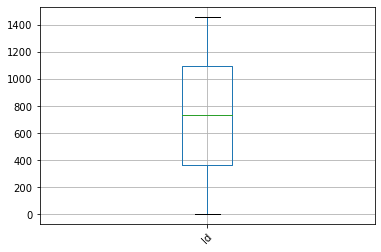

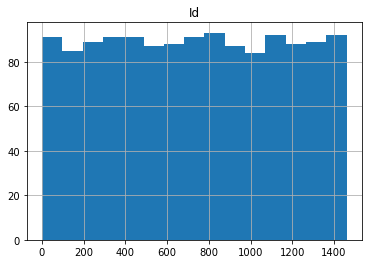

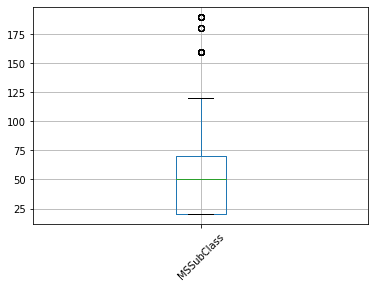

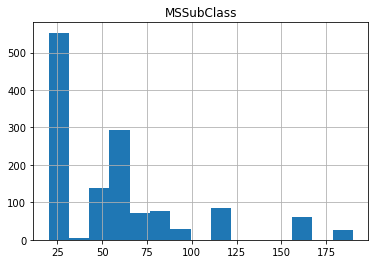

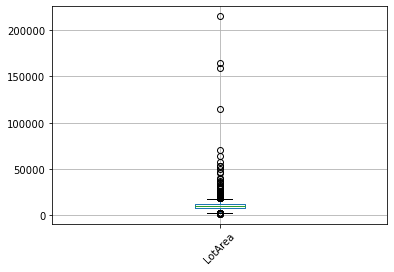

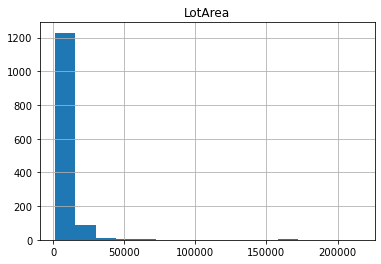

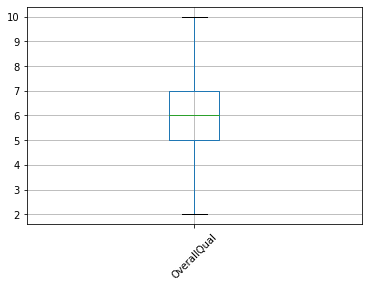

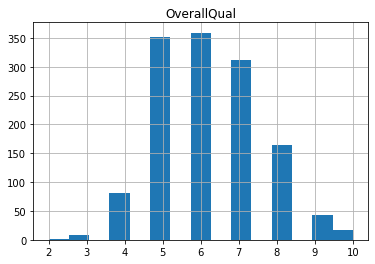

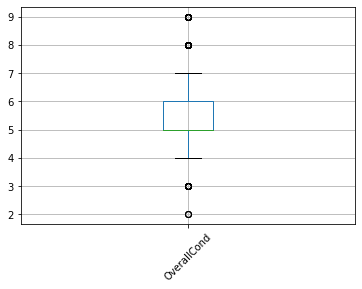

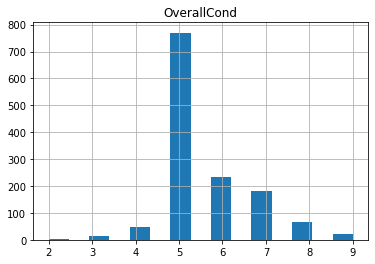

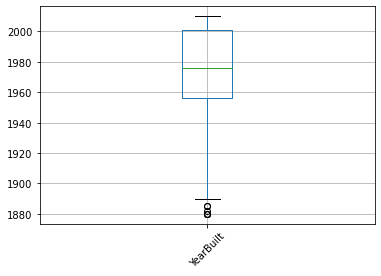

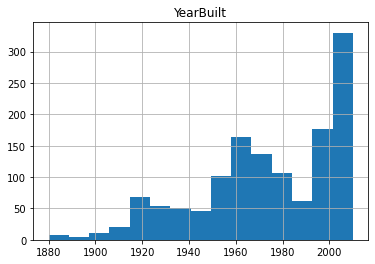

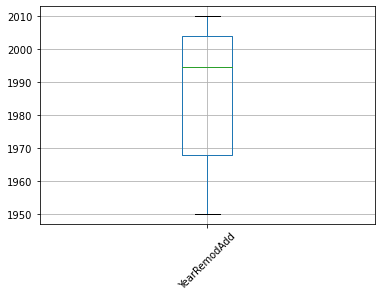

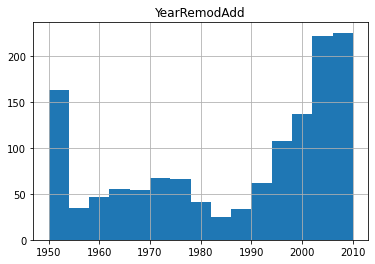

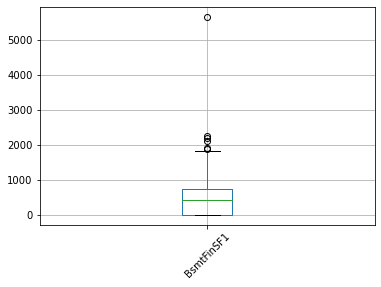

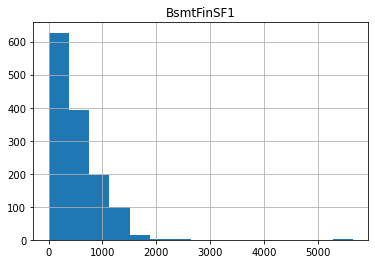

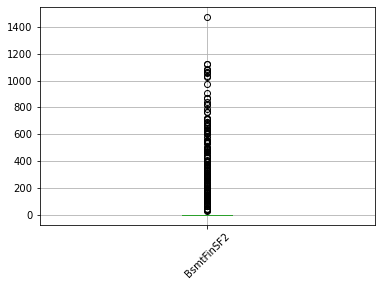

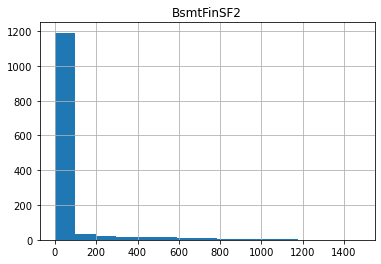

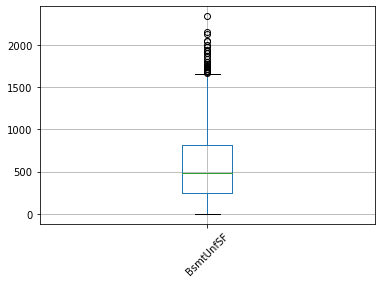

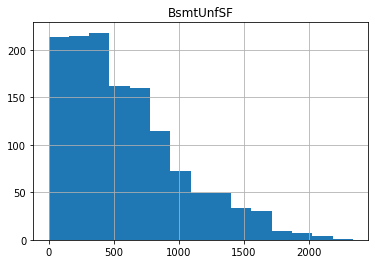

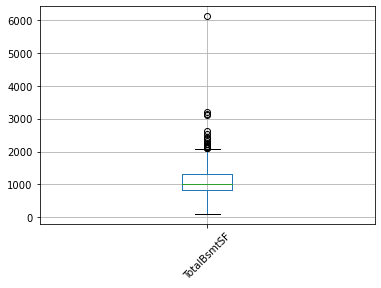

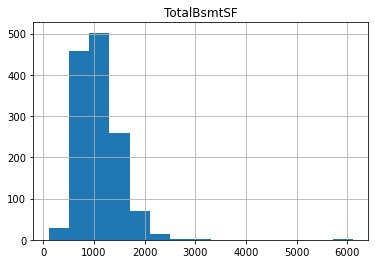

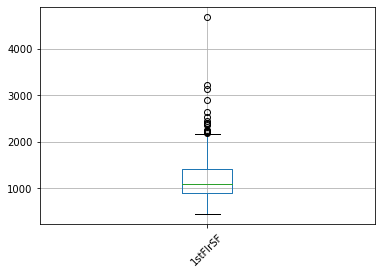

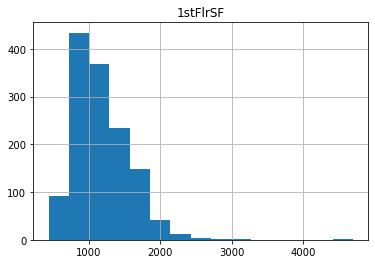

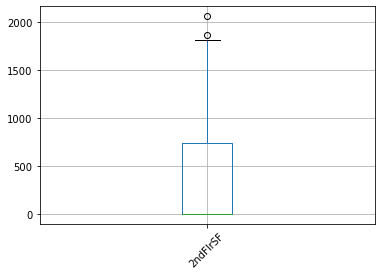

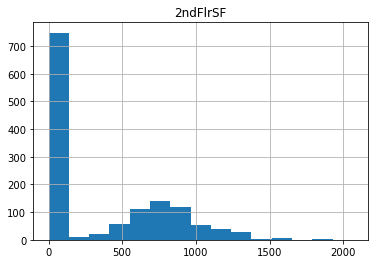

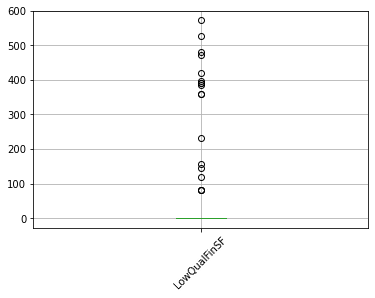

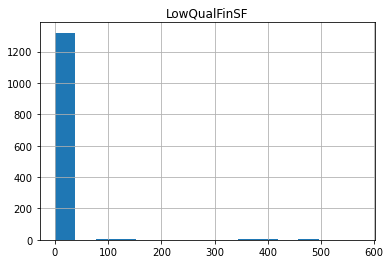

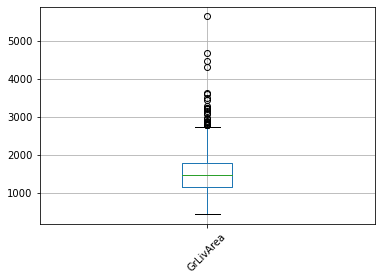

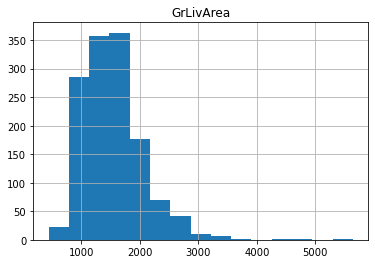

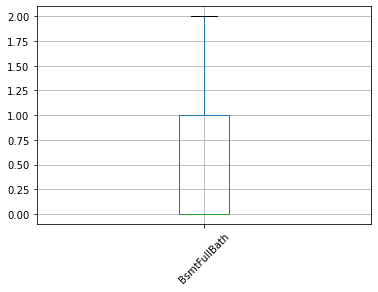

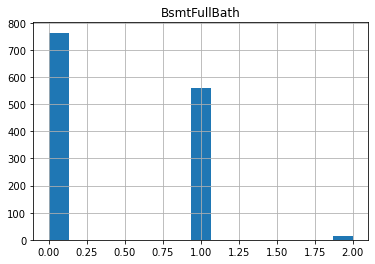

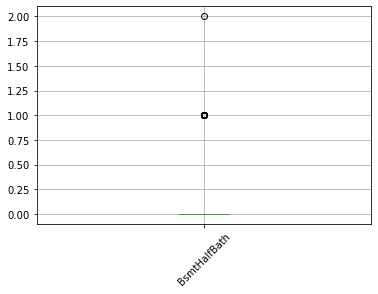

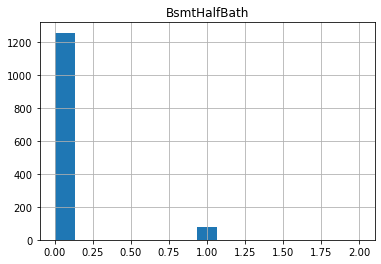

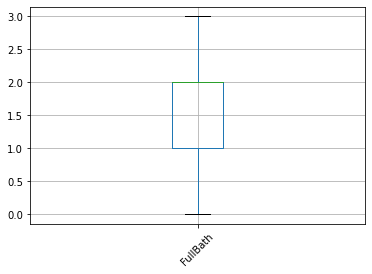

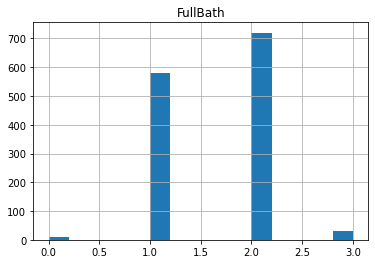

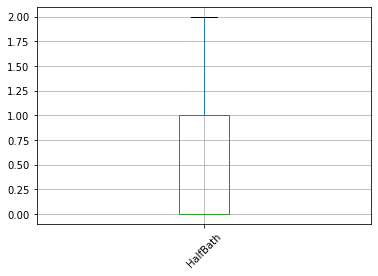

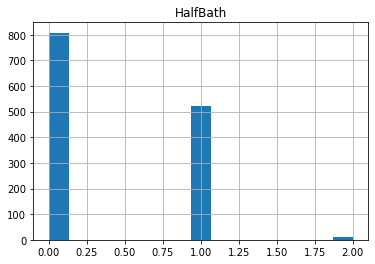

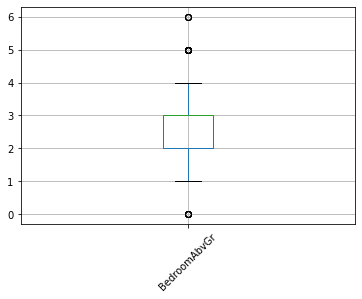

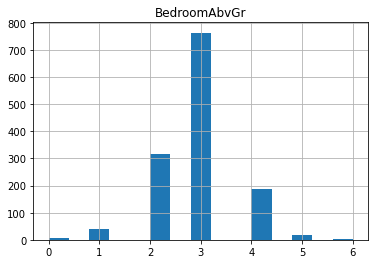

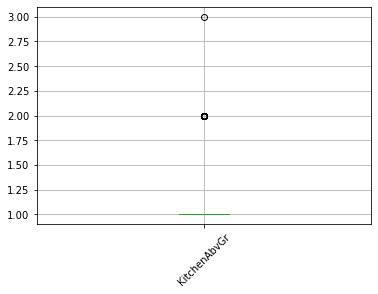

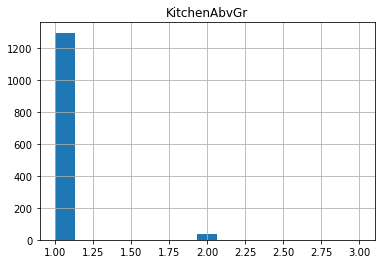

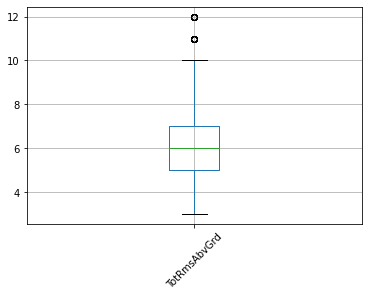

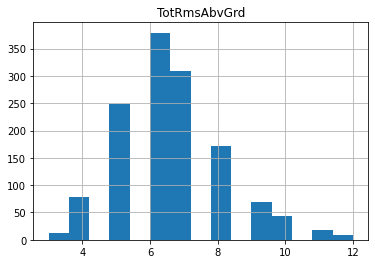

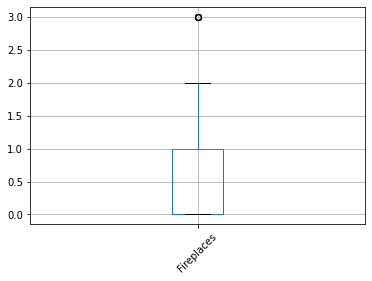

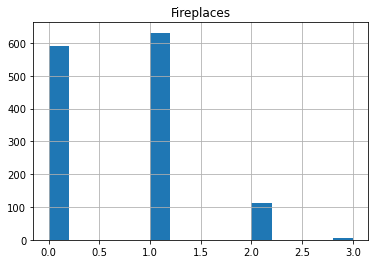

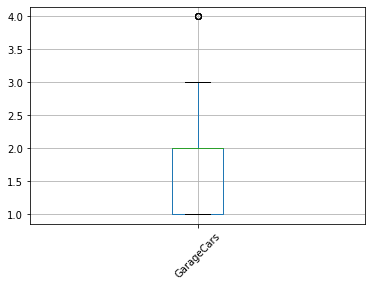

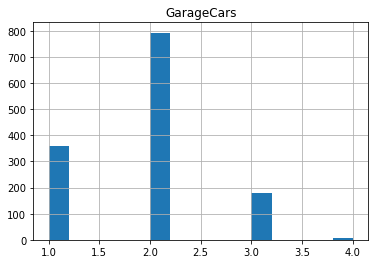

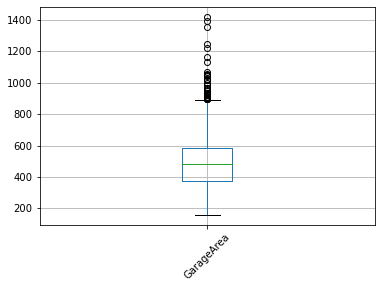

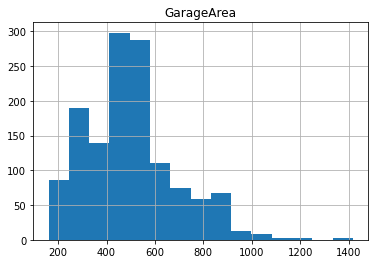

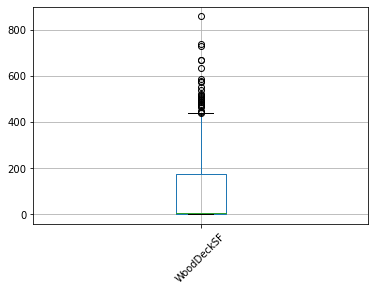

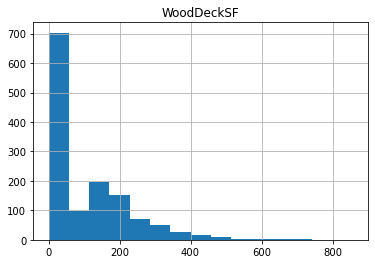

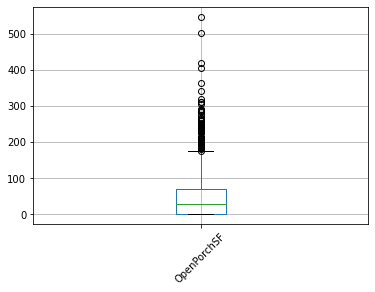

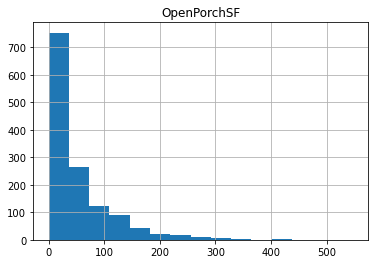

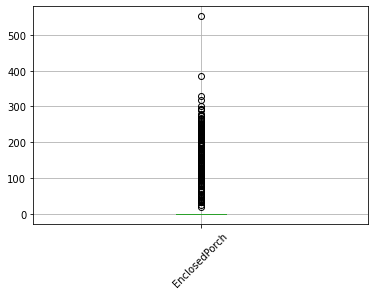

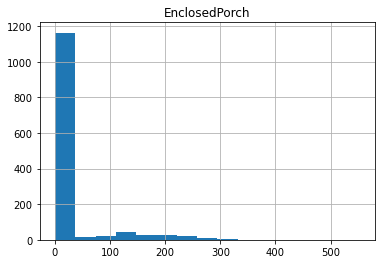

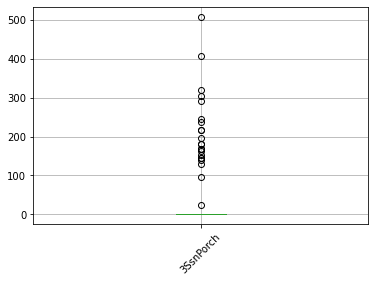

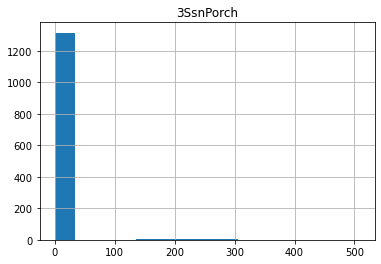

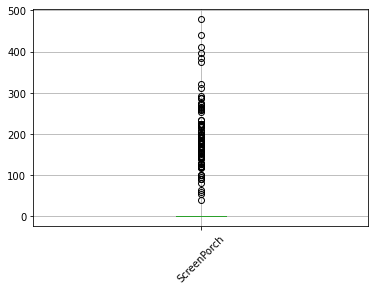

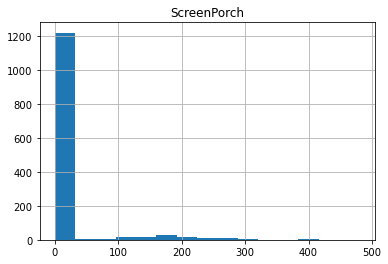

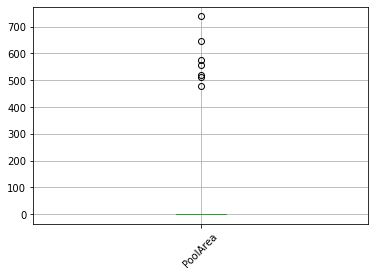

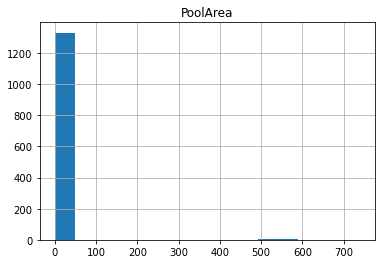

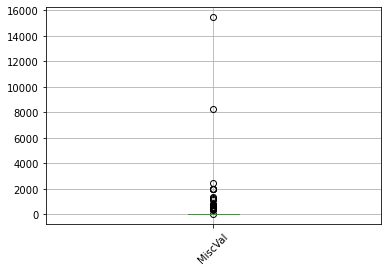

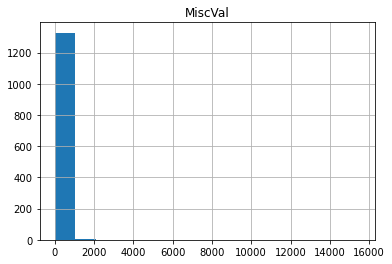

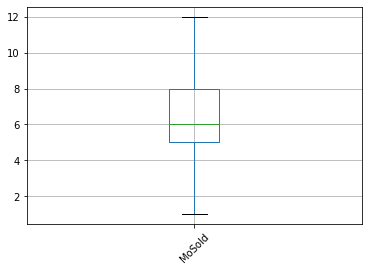

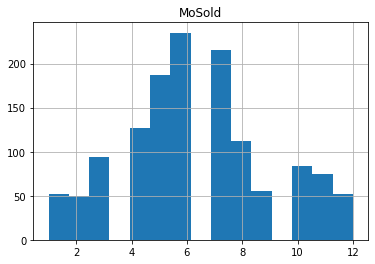

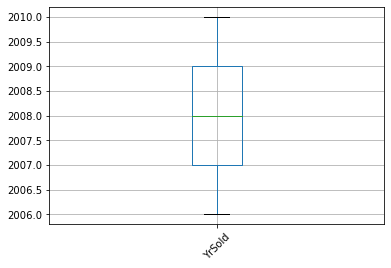

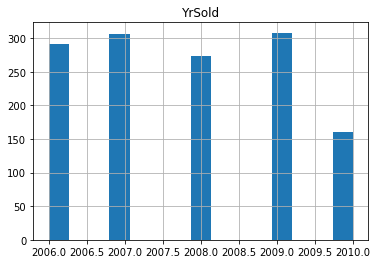

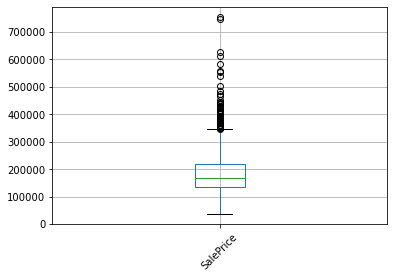

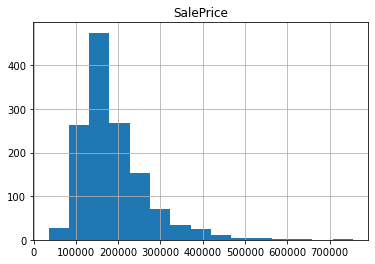

In [555]:
list_numerical_columns = df_NArowsdropped.select_dtypes('int64').columns.tolist()
for box in list_numerical_columns:
    plt.figure()
    df_NArowsdropped.boxplot(column=box,rot=45)
    df_NArowsdropped.hist(column=box,bins =15 )
    

In [556]:
#dropping ID columns
df_readyforencode = df_NArowsdropped.drop(columns="Id")
df_readyforencode.head(5)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


## ready to encode

In [557]:
# Generate our categorical variable list
df_readyforencode_cat = df_readyforencode.dtypes[df_readyforencode.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
df_readyforencode[df_readyforencode_cat].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      14
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         4
Foundation        5
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           4
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [558]:
list_of_unique_va_cat_dummy = df_readyforencode[df_readyforencode_cat].nunique() > 10
list_of_unique_va_cat=list_of_unique_va_cat_dummy[list_of_unique_va_cat_dummy==True].index.tolist()
print(f'list of features that have more than 10 categories: {list_of_unique_va_cat}')

list of features that have more than 10 categories: ['Neighborhood', 'Exterior1st', 'Exterior2nd']


C:\Users\14078\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\14078\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\14078\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

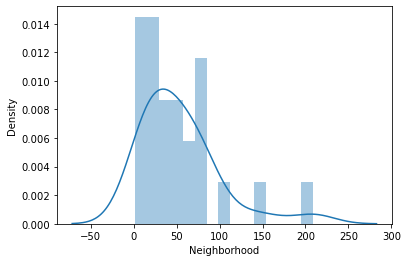

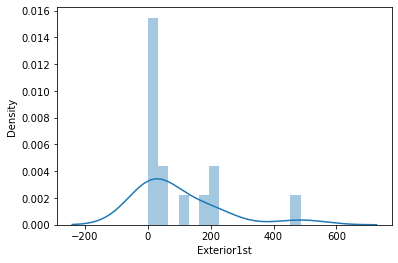

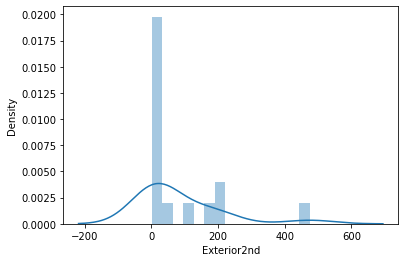

In [559]:
# Visualizing the data using density plot
for col in list_of_unique_va_cat:
#     print( df_readyforencode[col].value_counts())
    plt.figure()
    sns.distplot(a=df_readyforencode[col].value_counts(),bins=15)

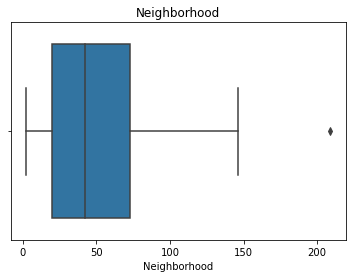

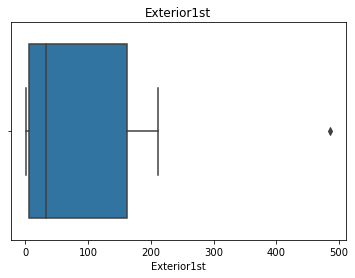

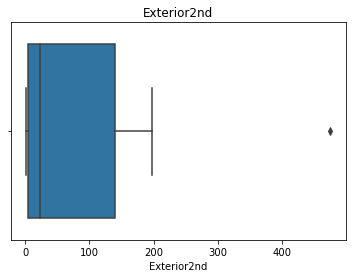

In [560]:
# Visualizing the data in boxplot format
for col in list_of_unique_va_cat:
#     print( df_readyforencode[col].value_counts())
    plt.figure()
#     df_readyforencode[col].value_counts().plot.density()
#     df_readyforencode[col].value_counts().hist()
    plt.title(col)
    ax = sns.boxplot(x=df_readyforencode[col].value_counts())
    
    



In [561]:
# %%%%%%% need to bin here for 3 columns

def replace_col_data_for_binning(df,col,limit):
    col_val_count = df[col].value_counts()
    replace_col_data = list(col_val_count[col_val_count<limit].index)
    for data in replace_col_data:
        df[col]= df[col].replace(data,"Other")
    return df

df_readyforencode1 = df_readyforencode.copy()    

print(list_of_unique_va_cat)

replace_col_data_for_binning(df_readyforencode1,list_of_unique_va_cat[0],20)
replace_col_data_for_binning(df_readyforencode1,list_of_unique_va_cat[1],40)
replace_col_data_for_binning(df_readyforencode1,list_of_unique_va_cat[2],40)




['Neighborhood', 'Exterior1st', 'Exterior2nd']


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Other,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [562]:
df_readyforencode1[list_of_unique_va_cat[2]].value_counts()

VinylSd    475
MetalSd    197
HdBoard    197
Wd Sdng    176
Plywood    127
Other      115
CmentBd     51
Name: Exterior2nd, dtype: int64

In [563]:
df_readyforencode[list_of_unique_va_cat[2]].value_counts()

VinylSd    475
MetalSd    197
HdBoard    197
Wd Sdng    176
Plywood    127
CmentBd     51
Wd Shng     32
Stucco      23
BrkFace     22
AsbShng     16
ImStucc     10
Brk Cmn      6
AsphShn      2
Stone        2
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

## here is option 1 for encoding : using oneHotencoder

In [564]:
if feature_encoding == 1 :
    
    # Create a OneHotEncoder instance
    enc = OneHotEncoder(sparse=False)



    # Fit and transform the OneHotEncoder using the categorical variable list
    encode_df = pd.DataFrame(enc.fit_transform(df_readyforencode1[df_readyforencode_cat]))

    # Add the encoded variable names to the DataFrame
    encode_df.columns = enc.get_feature_names(df_readyforencode_cat)
    print(encode_df)


### it looks like there are way too many columns above using onehotencoder


In [565]:
if feature_encoding ==1 :
    print(f'number of columns after OneHOTEncoding is :{len(encode_df.columns)}')

## In the below section we merge the encoded columns and drop the copies

In [566]:
if feature_encoding == 1 :
    df_readyforencode1 = df_readyforencode1.merge(encode_df,left_index=True, right_index=True)
    df_ready_final = df_readyforencode1.drop(df_readyforencode_cat,1)
    print(df_ready_final.head())

## Option 0: skipping categories (feature_encoding =0)

In [567]:

if feature_encoding ==0 :
    df_readyforencode0 = df_readyforencode.copy()
    df_readyforencode0=df_readyforencode0.drop(df_readyforencode_cat,axis=1)
#     df_readyforencode2.shape
    # df_readyforencode.shape
    # df_readyforencode_cat
    df_ready_final = df_readyforencode0
    print(f'skipping all the catergories has this many columns: {len(df_ready_final.columns)}')

## Option 2: Mean Encoding (feature_encoding =2)

In [568]:
if feature_encoding == 2:
    df_readyforencode2 = df_readyforencode.copy()
    for col in df_readyforencode_cat:
        df_readyforencode2[col] = df_readyforencode2[col].map(df.groupby(col)['SalePrice'].mean())

    df_ready_final = df_readyforencode2
    print(f'Mean Encodign has this many columns: {len(df_ready_final.columns)}')

## Option 3: Median Encoding (feature_encoding =3)


In [569]:
if feature_encoding == 3:
    df_readyforencode3 = df_readyforencode.copy()
    for col in df_readyforencode_cat:
        df_readyforencode3[col] = df_readyforencode3[col].map(df.groupby(col)['SalePrice'].median())

    df_ready_final = df_readyforencode3
    print(f'Mean Encodign has this many columns: {len(df_ready_final.columns)}')

## Option 4: Binary Encoding (feature_encoding =4)


In [571]:

if feature_encoding == 4:
    
    df_readyforencode4 = df_readyforencode.copy()  
    ce_bin = ce.BinaryEncoder()
    # ce_bin.fit_transform(X, y)
    # encode_df = pd.DataFrame(ce_bin.fit_transform(df_readyforencode4[df_readyforencode_cat]))

    df_ready_final = pd.DataFrame(ce_bin.fit_transform(df_readyforencode4))

    print(f'Bianary Encodign has this many columns: {len(df_ready_final.columns)}')
    print(df_ready_final)

Bianary Encodign has this many columns: 154
      MSSubClass  MSZoning_0  MSZoning_1  MSZoning_2  LotArea  Street_0  \
0             60           0           0           1     8450         0   
1             20           0           0           1     9600         0   
2             60           0           0           1    11250         0   
3             70           0           0           1     9550         0   
4             60           0           0           1    14260         0   
...          ...         ...         ...         ...      ...       ...   
1455          60           0           0           1     7917         0   
1456          20           0           0           1    13175         0   
1457          70           0           0           1     9042         0   
1458          20           0           0           1     9717         0   
1459          20           0           0           1     9937         0   

      Street_1  LotShape_0  LotShape_1  LotShape_2  ...

## splitting input and output

In [572]:
y = df_ready_final['SalePrice']
X = df_ready_final.drop(columns=['SalePrice'])
X.shape

(1338, 153)

In [573]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# , stratify=y

In [574]:
# Create a Robust instance
scaler = RobustScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [575]:
import os
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5*804,
     )

In [576]:
number_input_features = len(X_train_scaled[0])
number_input_features

153

In [577]:
print(f'X_train_scaled:{X_train_scaled.shape}')
print(f'X_test_scaled:{X_test_scaled.shape}')
print(f'y:{y.shape}')

X_train_scaled:(1003, 153)
X_test_scaled:(335, 153)
y:(1338,)


In [579]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 200
hidden_nodes_layer2 = 120
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 200)               30800     
                                                                 
 dense_76 (Dense)            (None, 120)               24120     
                                                                 
 dense_77 (Dense)            (None, 1)                 121       
                                                                 
Total params: 55,041
Trainable params: 55,041
Non-trainable params: 0
_________________________________________________________________


In [580]:
# Compile the model
# nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
nn.compile(loss="mean_squared_error", optimizer="adam") #since we are doing regression

In [581]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=600,callbacks=[cp_callback])

Epoch 1/600
32/32 [==============================] - 1s 2ms/step - loss: 42945167360.0000
Epoch 2/600
32/32 [==============================] - 0s 2ms/step - loss: 42773094400.0000
Epoch 3/600
32/32 [==============================] - 0s 2ms/step - loss: 42175012864.0000
Epoch 4/600
32/32 [==============================] - 0s 2ms/step - loss: 40780050432.0000
Epoch 5/600
32/32 [==============================] - 0s 2ms/step - loss: 38372261888.0000
Epoch 6/600
32/32 [==============================] - 0s 2ms/step - loss: 35907633152.0000
Epoch 7/600
32/32 [==============================] - 0s 2ms/step - loss: 33704032256.0000
Epoch 8/600
32/32 [==============================] - 0s 2ms/step - loss: 32143917056.0000
Epoch 9/600
32/32 [==============================] - 0s 2ms/step - loss: 30693820416.0000
Epoch 10/600
32/32 [==============================] - 0s 2ms/step - loss: 29257926656.0000
Epoch 11/600
32/32 [==============================] - 0s 2ms/step - loss: 27812513792.0000
Epoch 12

32/32 [==============================] - 0s 2ms/step - loss: 1636814720.0000
Epoch 92/600
32/32 [==============================] - 0s 2ms/step - loss: 1645412224.0000
Epoch 93/600
32/32 [==============================] - 0s 2ms/step - loss: 1633009792.0000
Epoch 94/600
32/32 [==============================] - 0s 2ms/step - loss: 1624494848.0000
Epoch 95/600
32/32 [==============================] - 0s 2ms/step - loss: 1622836096.0000
Epoch 96/600
32/32 [==============================] - 0s 2ms/step - loss: 1592832768.0000
Epoch 97/600
32/32 [==============================] - 0s 2ms/step - loss: 1591109376.0000
Epoch 98/600
32/32 [==============================] - 0s 2ms/step - loss: 1579471744.0000
Epoch 99/600
32/32 [==============================] - 0s 2ms/step - loss: 1570637568.0000
Epoch 100/600
32/32 [==============================] - 0s 2ms/step - loss: 1582931072.0000
Epoch 101/600
32/32 [==============================] - 0s 2ms/step - loss: 1566362496.0000
Epoch 102/600
32/32 [

32/32 [==============================] - 0s 2ms/step - loss: 1141433088.0000
Epoch 180/600
32/32 [==============================] - 0s 2ms/step - loss: 1141805568.0000
Epoch 181/600
32/32 [==============================] - 0s 2ms/step - loss: 1134459264.0000
Epoch 182/600
32/32 [==============================] - 0s 2ms/step - loss: 1121356672.0000
Epoch 183/600
32/32 [==============================] - 0s 2ms/step - loss: 1119870464.0000
Epoch 184/600
32/32 [==============================] - 0s 2ms/step - loss: 1110493056.0000
Epoch 185/600
32/32 [==============================] - 0s 2ms/step - loss: 1118161536.0000
Epoch 186/600
32/32 [==============================] - 0s 2ms/step - loss: 1115387648.0000
Epoch 187/600
32/32 [==============================] - 0s 2ms/step - loss: 1101277440.0000
Epoch 188/600
32/32 [==============================] - 0s 2ms/step - loss: 1108376960.0000
Epoch 189/600
32/32 [==============================] - 0s 2ms/step - loss: 1100147072.0000
Epoch 190/600

32/32 [==============================] - 0s 2ms/step - loss: 851036352.0000
Epoch 269/600
32/32 [==============================] - 0s 2ms/step - loss: 846261888.0000
Epoch 270/600
32/32 [==============================] - 0s 2ms/step - loss: 856320960.0000
Epoch 271/600
32/32 [==============================] - 0s 2ms/step - loss: 850535040.0000
Epoch 272/600
32/32 [==============================] - 0s 2ms/step - loss: 844723968.0000
Epoch 273/600
32/32 [==============================] - 0s 2ms/step - loss: 835337600.0000
Epoch 274/600
32/32 [==============================] - 0s 2ms/step - loss: 851250752.0000
Epoch 275/600
32/32 [==============================] - 0s 2ms/step - loss: 833105088.0000
Epoch 276/600
32/32 [==============================] - 0s 2ms/step - loss: 831451264.0000
Epoch 277/600
32/32 [==============================] - 0s 2ms/step - loss: 832727872.0000
Epoch 278/600
32/32 [==============================] - 0s 2ms/step - loss: 877994624.0000
Epoch 279/600
32/32 [===

32/32 [==============================] - 0s 2ms/step - loss: 677512128.0000
Epoch 360/600
32/32 [==============================] - 0s 2ms/step - loss: 679196800.0000
Epoch 361/600
32/32 [==============================] - 0s 2ms/step - loss: 671104832.0000
Epoch 362/600
32/32 [==============================] - 0s 2ms/step - loss: 667750528.0000
Epoch 363/600
32/32 [==============================] - 0s 2ms/step - loss: 664806336.0000
Epoch 364/600
32/32 [==============================] - 0s 2ms/step - loss: 668477056.0000
Epoch 365/600
32/32 [==============================] - 0s 2ms/step - loss: 673268096.0000
Epoch 366/600
32/32 [==============================] - 0s 2ms/step - loss: 662878400.0000
Epoch 367/600
32/32 [==============================] - 0s 3ms/step - loss: 664671488.0000
Epoch 368/600
32/32 [==============================] - 0s 2ms/step - loss: 664188480.0000
Epoch 369/600
32/32 [==============================] - 0s 2ms/step - loss: 657103872.0000
Epoch 370/600
32/32 [===

32/32 [==============================] - 0s 2ms/step - loss: 562147008.0000
Epoch 449/600
32/32 [==============================] - 0s 2ms/step - loss: 565600000.0000
Epoch 450/600
32/32 [==============================] - 0s 2ms/step - loss: 555534016.0000
Epoch 451/600
32/32 [==============================] - 0s 2ms/step - loss: 557777600.0000
Epoch 452/600
32/32 [==============================] - 0s 2ms/step - loss: 554209664.0000
Epoch 453/600
32/32 [==============================] - 0s 2ms/step - loss: 565337664.0000
Epoch 454/600
32/32 [==============================] - 0s 2ms/step - loss: 557888256.0000
Epoch 455/600
32/32 [==============================] - 0s 2ms/step - loss: 550495040.0000
Epoch 456/600
32/32 [==============================] - 0s 2ms/step - loss: 547936128.0000
Epoch 457/600
32/32 [==============================] - 0s 2ms/step - loss: 550564032.0000
Epoch 458/600
32/32 [==============================] - 0s 2ms/step - loss: 555661952.0000
Epoch 459/600
32/32 [===

32/32 [==============================] - 0s 2ms/step - loss: 454413696.0000
Epoch 538/600
32/32 [==============================] - 0s 2ms/step - loss: 464254848.0000
Epoch 539/600
32/32 [==============================] - 0s 2ms/step - loss: 456182944.0000
Epoch 540/600
32/32 [==============================] - 0s 2ms/step - loss: 457667264.0000
Epoch 541/600
32/32 [==============================] - 0s 2ms/step - loss: 448094080.0000
Epoch 542/600
32/32 [==============================] - 0s 2ms/step - loss: 450709120.0000
Epoch 543/600
32/32 [==============================] - 0s 2ms/step - loss: 467754080.0000
Epoch 544/600
32/32 [==============================] - 0s 2ms/step - loss: 465959616.0000
Epoch 545/600
32/32 [==============================] - 0s 2ms/step - loss: 452405952.0000
Epoch 546/600
32/32 [==============================] - 0s 2ms/step - loss: 455222816.0000
Epoch 547/600
32/32 [==============================] - 0s 2ms/step - loss: 455744768.0000
Epoch 548/600
32/32 [===

In [582]:
model_loss = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss on the Test Dataset: {model_loss}")

11/11 - 0s - loss: 2423761920.0000 - 134ms/epoch - 12ms/step
Loss on the Test Dataset: 2423761920.0


In [583]:
t = np.arange(0,max(predictions),100)

32/32 [==============================] - 0s 1ms/step


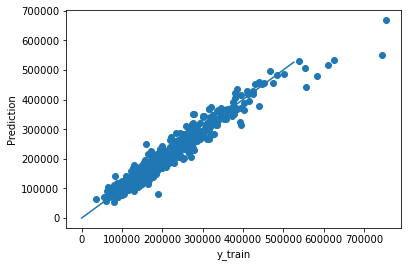

In [584]:
predictions = nn.predict(X_train_scaled)
plt.scatter(y_train,predictions)
plt.plot(t,t)
plt.xlabel('y_train')
plt.ylabel('Prediction')
plt.show()

11/11 [==============================] - 0s 1ms/step


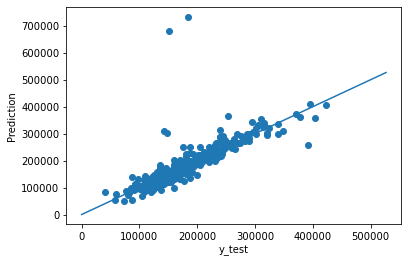

In [585]:
predictions = nn.predict(X_test_scaled)
plt.scatter(y_test,predictions)
plt.plot(t,t)
plt.xlabel('y_test')
plt.ylabel('Prediction')
plt.show()

# Adding RandomForestRegressor
from scikit learn

In [586]:
# regr = RandomForestRegressor(n_estimators=500,max_depth=100, random_state=0)
regr = RandomForestRegressor()

regr.fit(X_train_scaled, y_train)

RandomForestRegressor()

Loss on the test dataset using RandomForestRegressor: 1087392947.734357


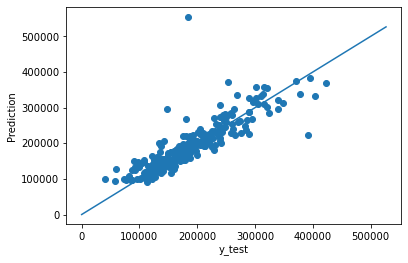

In [587]:

predictions = regr.predict(X_test_scaled)
print(f'Loss on the test dataset using RandomForestRegressor: {mean_squared_error(y_test, predictions)}')
plt.scatter(y_test,predictions)
plt.plot(t,t)
plt.xlabel('y_test')
plt.ylabel('Prediction')
plt.show()#

## This part checks for feature importance

In [467]:
# regr.feature_importances_

## Next section plots sorted feature importance  ( only TOP 15 important Features)

<AxesSubplot:>

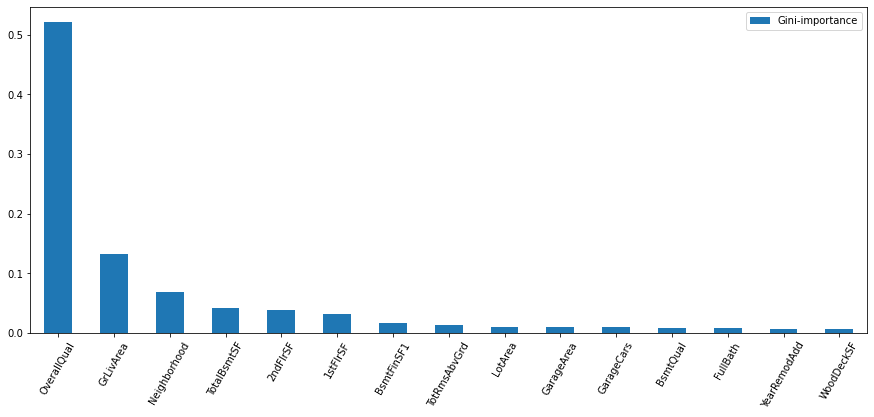

In [468]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, regr.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',ascending = False).head(15).plot(kind='bar', rot=60,figsize=(15,6))